<a href="https://colab.research.google.com/github/IrfanPavel/Advanced-Pandas-Operations/blob/main/00_objects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas objects

So far, we have manipulated data which were stored in NumPy arrays. Let us consider 2D data.

In [1]:
import numpy as np

ar = 0.5 * np.eye(3)
ar[2, 1] = 1
ar

array([[0.5, 0. , 0. ],
       [0. , 0.5, 0. ],
       [0. , 1. , 0.5]])

We could visualize it with Matplotlib.

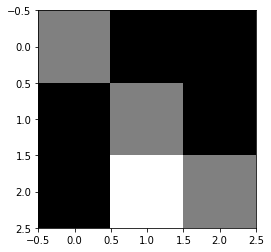

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(ar, cmap=plt.cm.gray)

Raw data could look like this. Say that columns hold variables and rows hold observations (or records). We may want to label the data (set some metadata). We may also want to handle non-numerical data. Then, we want to store our data in a DataFrame, a 2D labelled data structure with columns of potentially different types.

## The DataFrame object

In [3]:
import pandas as pd

df = pd.DataFrame(ar)

df

,0,1,2
0,0.5,0.0,0.0
1,0.0,0.5,0.0
2,0.0,1.0,0.5


The DataFrame object has attributes...

In [4]:
df.size

df.shape

(3, 3)

... and methods, as we shall see in the following. For now, let us label our data.

In [5]:
df.columns = ['red', 'green', 'blue']

Note that, alternatively, you could have done `df.rename(columns={0: 'red', 1: 'green', 2: 'blue'}, inplace=True)`.

In [6]:
df

,red,green,blue
0,0.5,0.0,0.0
1,0.0,0.5,0.0
2,0.0,1.0,0.5


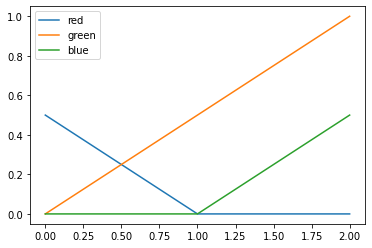

In [7]:
df.plot()

(This is a terrible visualization though... 3-cycle needed!)

### Hands-on exercises

1. Create another DataFrame, `df2`, equal to `df` (with the same values for each column) by passing a dictionary to `pd.DataFrame()`. You can check your answer by running `pd.testing.assert_frame_equal(df, df2, check_like=True)`. 
2. What is the type of object `df[['green']]`?
3. What is the type of object `df['green']`?



## The Series object

A Series is a 1D labelled data structure.

In [8]:
df['green']

0    0.0
1    0.5
2    1.0
Name: green, dtype: float64

It can hold any data type.

In [9]:
pd.Series(range(10))

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int64

In [10]:
s = pd.Series(['first', 'second', 'third'])

s

0     first
1    second
2     third
dtype: object

In [11]:
t = pd.Series([pd.Timestamp('2017-09-01'), pd.Timestamp('2017-09-02'), pd.Timestamp('2017-09-03')])

t

0   2017-09-01
1   2017-09-02
2   2017-09-03
dtype: datetime64[ns]

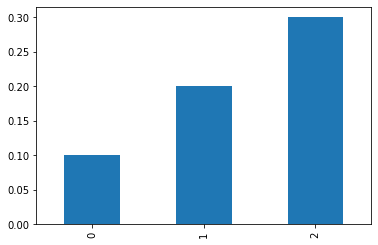

In [12]:
alpha = pd.Series(0.1 * np.arange(1, 4))

alpha.plot(kind='bar')

In [13]:
df['alpha'] = alpha

df

,red,green,blue,alpha
0,0.5,0.0,0.0,0.1
1,0.0,0.5,0.0,0.2
2,0.0,1.0,0.5,0.3


### Hands-on exercises

4. Create a series equal (element-wise) to the product of the 'green' variable and the 'alpha' variable. (Hint: It works like NumPy arrays.)
5. Label this series as 'pre_multiplied_green'. (Hint: Use tab completion to explore the list of attributes and/or scroll up to see which attribute should be set.)

## The Index object

The Index object stores axis labels for Series and DataFrames.

In [14]:
alpha.index

RangeIndex(start=0, stop=3, step=1)

In [15]:
df.index

RangeIndex(start=0, stop=3, step=1)

In [16]:
alpha

0    0.1
1    0.2
2    0.3
dtype: float64

In [17]:
alpha.index = s

In [18]:
alpha

first     0.1
second    0.2
third     0.3
dtype: float64

In [19]:
alpha.index

Index(['first', 'second', 'third'], dtype='object')

In [20]:
df.set_index(s)

,red,green,blue,alpha
first,0.5,0.0,0.0,0.1
second,0.0,0.5,0.0,0.2
third,0.0,1.0,0.5,0.3


In [21]:
df.set_index(s, inplace=True)

### Hands-on exercises

6. Set the index of `df` to be `t`, not `s`.
7. What is the difference between the index of `df` and that of `alpha`?
8. How would you call object `df['green']`?